<a href="https://colab.research.google.com/github/qazalmehrban/Medical-Segmentation/blob/ghazal/Copy_of_kaiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

[        -inf -62.95836314 -56.97971321 ... -53.52798599 -56.97971321
 -62.95836314]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

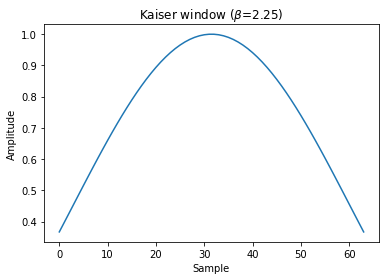

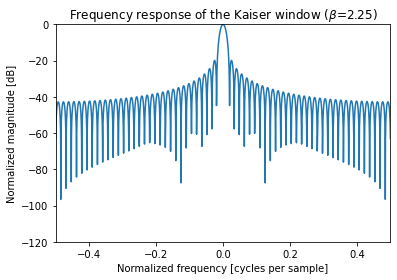

In [ ]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
print(response)
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

[        -inf -63.93286886 -72.42782107 ... -57.08458497 -72.42782107
 -63.93286886]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

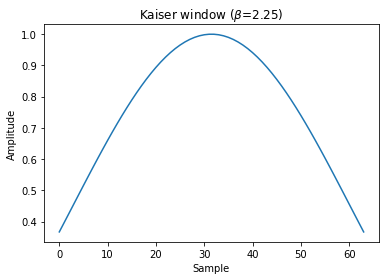

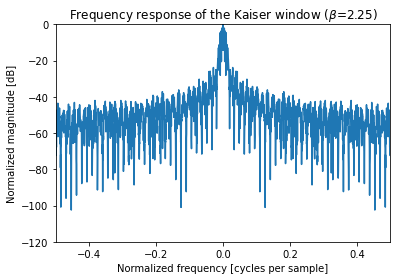

In [ ]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
mean = 0
std = 1 
num_samples = len(A)
noise = np.random.normal(mean, std, size=num_samples)
ffreq = fft(noise) / (len(noise)/2)
s_k = ffreq*A
k= fftshift(s_k)
response0 = 20 * np.log10(np.abs(fftshift(s_k / abs(s_k).max())))
print(response0)
plt.plot(freq, response0)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

[-31.33200032 -33.65771869 -32.88517519 ... -36.79797489 -32.88517519
 -33.65771869]


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

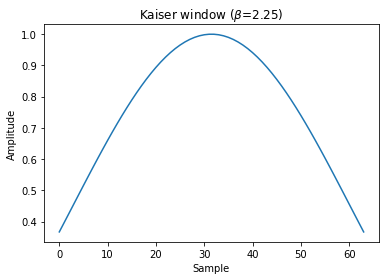

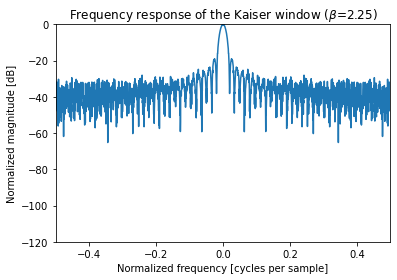

In [ ]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
beta=2.25
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
mean = 0
std = 1 
num_samples = len(A)
noise = np.random.normal(mean, std, size=num_samples)
ffreq = fft(noise) / (len(noise)/2)
s_f = ffreq - beta*(ffreq- A*(ffreq / abs(ffreq)))
s = fftshift(s_f)
response1 = 20 * np.log10(np.abs(fftshift(s_f / abs(s_f).max())))
print(response1)
plt.plot(freq, response1)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

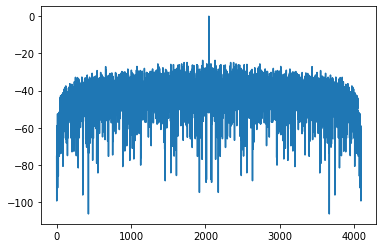

In [ ]:
sig_noise1 = noise + noise
corr1 =  20 * np.log10(np.abs(signal.correlate(sig_noise1, noise) / abs(signal.correlate(sig_noise1, noise).max())))
plt.plot(corr1)

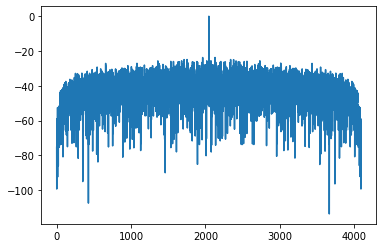

In [ ]:
sig_noise2 = k + noise
corr2 =  20 * np.log10(np.abs(signal.correlate(sig_noise2, noise) / abs(signal.correlate(sig_noise2, noise).max())))
plt.plot(corr2)

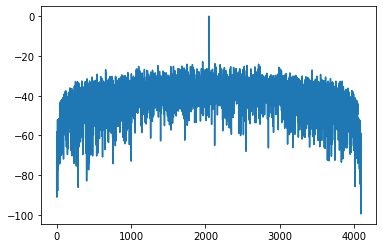

In [ ]:
sig_noise = s + noise
corr =  20 * np.log10(np.abs(signal.correlate(sig_noise, noise) / abs(signal.correlate(sig_noise, noise).max())))
plt.plot(corr)


